In [15]:
import pandas as pd
import numpy as np

In [83]:
ret = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv",  header = 0, index_col=0,  parse_dates = True )
ret

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,-99.99,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,-99.99,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,-99.99,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,-99.99,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [86]:
lo20 = ret['Lo 20']/100+1

In [87]:
lo20

192607    0.9943
192608    1.0384
192609    0.9952
192610    0.9671
192611    0.9945
           ...  
201808    1.0309
201809    0.9796
201810    0.8948
201811    0.9722
201812    0.8523
Name: Lo 20, Length: 1110, dtype: float64

In [88]:
lo20.size

1110

Get overeall GMean return over the periods. These returns are avg monthly returns 

In [89]:
gm_ret = (np.prod(lo20, axis=0))**(1/lo20.size)

In [90]:
gm_pct = ((gm_ret -1)* 100 ).round(2)
gm_pct

1.19

Convert the return to annualized return. There are two WAYS to calculate it. 
1. Take Monthly return and convert it to 12 month to annualized. 

2.  While computing return power it to 12 to convert returns from monthly to Annual.

In [91]:
#Correct way to do it
(1+gm_pct/100.0)**12 -1

0.15252711305920297

In [92]:
(np.prod(lo20, axis=0))**(12/lo20.size) -1 

0.15197701163833743

## Volatility

In [93]:
ret['Lo 20'].std()*(12**0.5)

33.67012751715778

## Hi20

In [94]:
Hi20returns = ret['Hi 20']/100
cumm_ret = np.product(Hi20returns+1)**(1/Hi20returns.size)
(cumm_ret)**12

1.0984902095125326

In [95]:
Hi20returns.std()* (12**0.5)

0.19511604155631326

In [107]:
## Returns from 1999 onwards
retfrom1999 = ret[(pd.to_datetime(ret.index, format='%Y%m') >= pd.Timestamp(1999, 1, 1))]
retfrom1999.size

4560

In [109]:
## Returns from 1999-2015
retTo2016 = retfrom1999[(pd.to_datetime(retfrom1999.index, format='%Y%m') < pd.Timestamp(2016, 1, 1))]
retTo2016

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
199901,-99.99,9.97,0.00,0.10,11.14,0.91,0.59,-1.93,1.53,12.70,4.95,1.55,-0.06,1.81,-0.79,-1.55,-2.31,0.30,2.84
199902,-99.99,-4.51,-7.38,-2.56,-3.99,-8.59,-7.96,-3.44,-1.72,-3.23,-6.98,-8.22,-9.17,-8.59,-7.26,-2.88,-3.98,-1.43,-2.03
199903,-99.99,-2.77,1.74,3.91,-3.08,-0.02,2.54,2.60,3.68,-3.04,-3.25,-0.61,0.89,2.24,2.88,0.84,4.29,4.41,2.91
199904,-99.99,8.38,9.38,8.51,8.24,8.88,10.14,10.37,6.79,7.71,10.31,9.38,8.12,9.85,10.47,9.31,11.40,6.61,6.98
199905,-99.99,4.18,3.49,0.27,4.35,3.39,3.24,2.51,-0.48,4.49,3.78,3.05,3.91,3.53,2.93,3.51,1.54,0.42,-1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201508,-99.99,-3.83,-5.96,-5.65,-3.47,-5.99,-5.29,-6.10,-5.59,-2.99,-4.88,-5.51,-6.61,-6.06,-4.44,-6.39,-5.76,-5.01,-6.20
201509,-99.99,-6.18,-5.95,-4.04,-6.10,-6.62,-6.03,-5.03,-3.33,-5.58,-7.59,-6.55,-6.71,-5.99,-6.08,-4.73,-5.40,-3.29,-3.38
201510,-99.99,4.28,6.11,7.06,3.85,5.91,6.97,6.10,7.10,2.71,7.10,6.30,5.41,7.57,6.30,5.37,6.99,6.41,7.80
201511,-99.99,2.24,2.87,0.31,1.65,5.23,1.85,1.01,0.15,1.09,3.26,5.02,5.48,3.19,0.37,1.31,0.64,-0.14,0.44


In [110]:
# Get cumm return from 1999 to 2015
ret2 = retTo2016['Lo 20']/100
ret2

199901    0.1114
199902   -0.0399
199903   -0.0308
199904    0.0824
199905    0.0435
           ...  
201508   -0.0347
201509   -0.0610
201510    0.0385
201511    0.0165
201512   -0.0500
Name: Lo 20, Length: 204, dtype: float64

In [112]:
ret2_mo = np.product(ret2+1)**(1/ret2.size) - 1

In [113]:
#annualized returns
ret2_ann = (1 + ret2_mo)**12 -1
ret2_ann

0.11442634058515022

In [115]:
##Annual Vol for Lo 20
ret2.std() * (12**0.5)

0.22889447266699597

In [118]:
#returns from 1999 -2015 for Hi20
retHi20 = retTo2016['Hi 20']/100
retHi20_mo = np.product(retHi20+1)**(1/retHi20.size) - 1
retHi20_ann = (1 + retHi20_mo)**12 -1
retHi20_ann

0.06286512130085131

In [119]:
#Annualized Vol for Hi 20
retHi20.std() * (12**0.5)

0.1727133212125047

## Max Drawdown

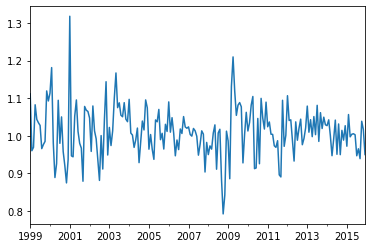

In [228]:
##MAx drawDown from 1999-2015 for Lo 20
# 'Lo 20', Hi20'
#Calc compound return
drawDS = 1+ret['Lo 20']/100
drawDS.index = pd.to_datetime(drawDS.index, format='%Y%m')
drawDS.index = drawDS.index.to_period('M')
#Apply Date Filter
drawDS = drawDS[drawDS.index >= '1999-01']
drawDS = drawDS[drawDS.index < '2016-01']
drawDS.plot()

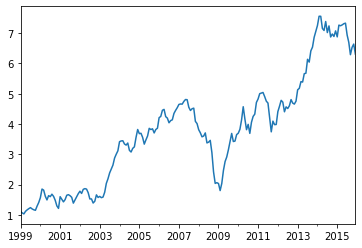

In [229]:
cummRetHiLo20 = (drawDS).cumprod()
cummRetHiLo20.plot()

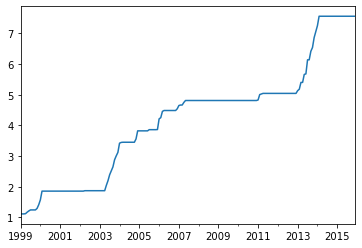

In [230]:
#Find Peak to Torugh
previous_peaks = cummRetHiLo20.cummax()
previous_peaks.plot()

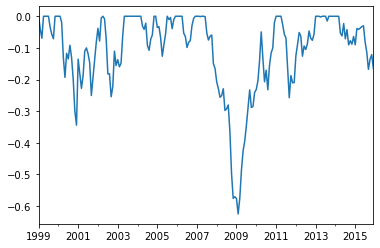

In [231]:
#Calculate peak to trough
drawdowns = (cummRetHiLo20/previous_peaks -1  )
drawdowns.plot()

In [232]:
#get Max drawdown
maxDraw = drawdowns.min()
maxDrawDt = drawdowns.idxmin()
maxDraw, maxDrawDt

(-0.6248092431236988, Period('2009-02', 'M'))

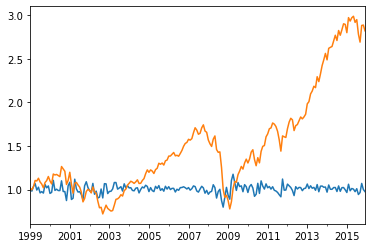

In [225]:
## Max Drawdown for Hi 20
##MAx drawDown from 1999-2015 for Lo 20
#  Hi20'
#Calc compound return
drawDSHi = 1+ret['Hi 20']/100
drawDSHi.index = pd.to_datetime(drawDSHi.index, format='%Y%m')
drawDSHi.index = drawDSHi.index.to_period('M')
#Apply Date Filter
drawDSHi = drawDSHi[drawDSHi.index >= '1999-01']
drawDSHi = drawDS[drawDS.index < '2016-01']
drawDSHi.plot()
cummRetHiLo20 = (drawDSHi).cumprod()
cummRetHiLo20.plot()

(-0.5527349978713652, Period('2009-02', 'M'))

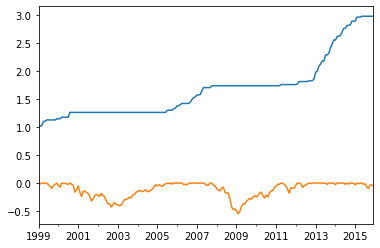

In [227]:
#Find Peak to Torugh
previous_peaks = cummRetHiLo20.cummax()
previous_peaks.plot()
#Calculate peak to trough
drawdowns = (cummRetHiLo20/previous_peaks -1  )
drawdowns.plot()
#get Max drawdown
maxDraw = drawdowns.min()
maxDrawDt = drawdowns.idxmin()
maxDraw, maxDrawDt

## Semideviation

In [142]:
## exhibited the highest semideviation
hfData = pd.read_csv("../data/edhec-hedgefundindices.csv",  header = 0, index_col=0,  parse_dates = True )
hfData2009 = hfData[ pd.to_datetime(hfData.index, format='%d%m%Y' ) >= pd.Timestamp(2009, 1, 1)]

In [144]:
means = hfData2009.mean(axis=0)
means

Convertible Arbitrage     0.662269
CTA Global                0.049664
Distressed Securities     0.655882
Emerging Markets          0.520504
Equity Market Neutral     0.255630
Event Driven              0.559496
Fixed Income Arbitrage    0.547815
Global Macro              0.267647
Long/Short Equity         0.520924
Merger Arbitrage          0.371597
Relative Value            0.545210
Short Selling            -1.035042
Funds Of Funds            0.246975
dtype: float64

In [163]:
means.shape

(13,)